In [1]:
!pip install mysql-connector

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp
import os
import pandas as pd
#
from mysql.connector import Error
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    connection = mysql.connector.connect(host='127.0.0.1',
                                         database='bbjewels',
                                         user='root',
                                         password='abcde12345',
                                         auth_plugin = 'mysql_native_password')
    print("Connection successful!")
#
except Error as e:
    print("Error while connecting to MySQL", e)


Connection successful!


In [4]:
tables = ['cust_email', 'cust_purchase_orders', 'customer', 'damages', 'employee', 'factory', 
          'final_product', 'jewelry_maker', 'purchase_history', 'quality_check_recorder', 
          'refinery', 'repairer', 'stock_handling_team', 'sup_email', 'supplier', 'vault', 
          'wholesale_market']

# Loop through each table and read data into DataFrame
for table in tables:
    query = f'SELECT * FROM bbjewels.{table}'
    df = pd.read_sql(query, connection)
    # Assign the DataFrame to a variable dynamically
    globals()[f'{table}_df'] = df

In [5]:
vault_df.head()

,Vault_Key,Vault_Nr,Location,Material_Name,Material_Quantity
0,KEY_51343,VAL_16,Precious Metals Vault,Confidential Documents,8.0
1,KEY_51649,VAL_29,Precious Metals Vault,Antique Artifacts,8.0
2,KEY_52117,VAL_2,Security Vault A,Silver Bullion,1.0
3,KEY_52253,VAL_52,Vault Room B,Gemstone Collection,10.0
4,KEY_52267,VAL_90,Armory,Gemstone Collection,3.0


In [6]:
supplier_df.head()

,Sup_ID,Material_ID,Sup_Name,Sup_Address,Sup_Type,Order_Type,Quantity_Supplied,Record_Number,Pur_id
0,SUP_3034,MAT_3,Constance Thornton,"Ap #522-5145 Arcu. Ave,Great Falls,Kansas,Unit...",Retailer,Express,59,72215097,PR 116
1,SUP_3283,MAT_96,Bruno Holland,"235-3619 Orci Avenue,Essex,Alabama,United States",Wholesaler,Standard,32,78692967,PR 110
2,SUP_3337,MAT_7,Lavinia Burton,"P.O. Box 324, 2569 Dictum Rd.,Kailua,Wyoming,U...",Wholesaler,Express,34,73776120,PR 123
3,SUP_3378,MAT_81,Hashim Vaughn,"209-3808 In Road,Idaho Falls,Ohio,United States",Retailer,Priority,95,83719201,PR 149
4,SUP_3444,MAT_43,Jerry Wilkerson,"811-9634 Id Rd.,Biloxi,Florida,United States",Wholesaler,Express,89,74326742,PR 124


In [7]:
vault_df.columns

Index(['Vault_Key', 'Vault_Nr', 'Location', 'Material_Name',
       'Material_Quantity'],
      dtype='object')

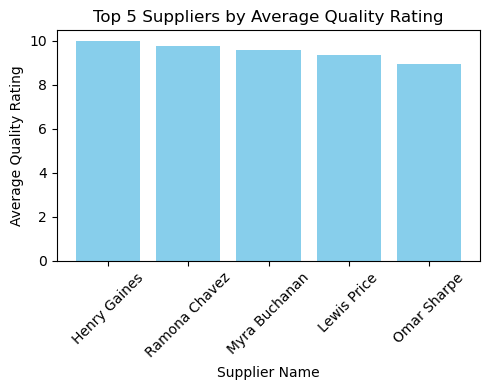

In [31]:
# Define the SQL query
query = """
    SELECT Sup_Name, AVG(Quality_Rating) AS Avg_Quality_Rating
    FROM QUALITY_CHECK_RECORDER q
    JOIN supplier s ON q.Record_Number = s.Record_Number
    GROUP BY Sup_Name
    ORDER BY Avg_Quality_Rating DESC
    LIMIT 5;
"""

# Execute the query and read data into a DataFrame
df_query_1 = pd.read_sql(query, connection)

# Plotting the bar chart
plt.figure(figsize=(5, 4))
plt.bar(df_query_1['Sup_Name'], df_query_1['Avg_Quality_Rating'], color='skyblue')
plt.title('Top 5 Suppliers by Average Quality Rating')
plt.xlabel('Supplier Name')
plt.ylabel('Average Quality Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

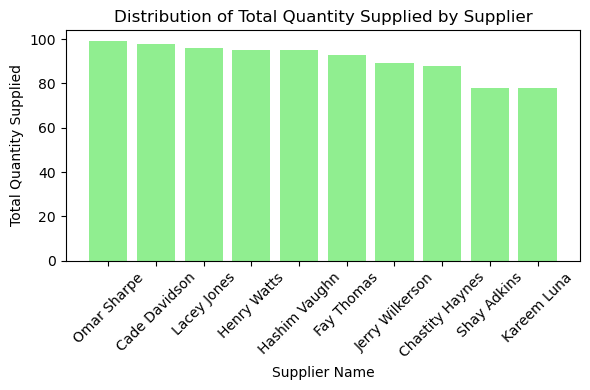

In [67]:
# Define the SQL query
query = """
    SELECT s.Sup_Name, SUM(s.Quantity_Supplied) AS Total_Quantity_Supplied
    FROM SUPPLIER s
    GROUP BY s.Sup_Name
    ORDER BY Total_Quantity_Supplied DESC
    Limit 10;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(df['Sup_Name'], df['Total_Quantity_Supplied'], color='lightgreen')
plt.title('Distribution of Total Quantity Supplied by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Total Quantity Supplied')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


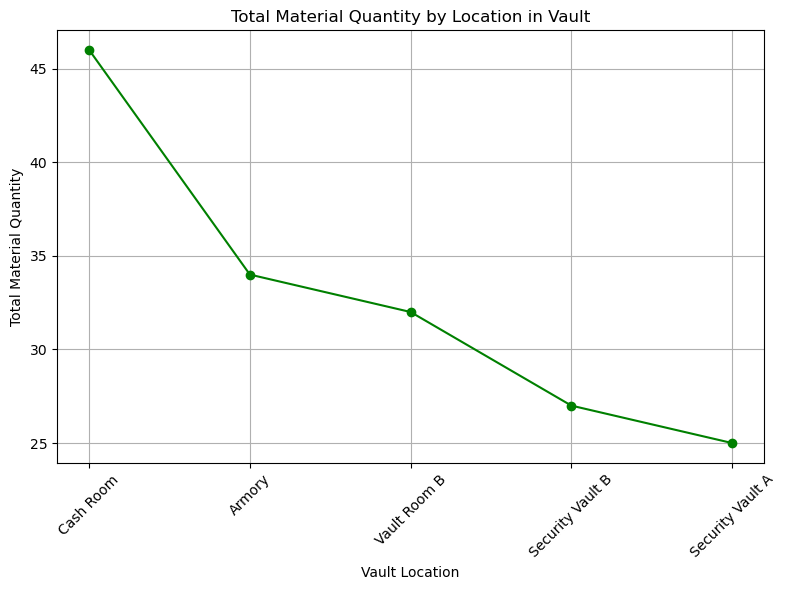

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the SQL query
query = """
    SELECT Location as Vault_Location, SUM(Material_Quantity) AS Total_Material_Quantity
    FROM VAULT
    GROUP BY Location
    ORDER BY Total_Material_Quantity DESC
    limit 5;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(df['Vault_Location'], df['Total_Material_Quantity'], marker='o', color='green', linestyle='-')
plt.title('Total Material Quantity by Location in Vault')
plt.xlabel('Vault Location')
plt.ylabel('Total Material Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


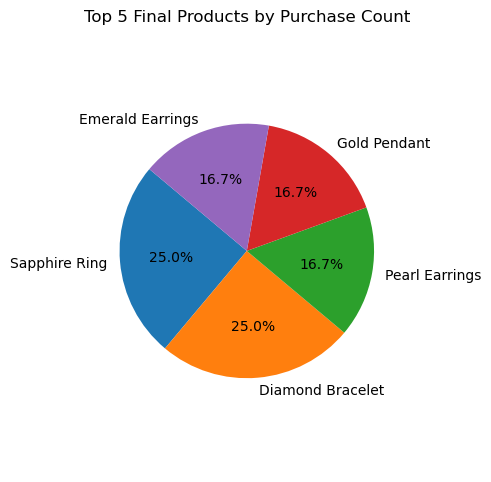

In [63]:
# Define the SQL query
query = """
    SELECT Prod_Name, COUNT(*) AS Purchase_Count 
    FROM FINAL_PRODUCT 
    GROUP BY Prod_Name 
    ORDER BY Purchase_Count DESC 
    LIMIT 5;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(df['Purchase_Count'], labels=df['Prod_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Final Products by Purchase Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [14]:
# Define the SQL query
query = """
SELECT cust_id
FROM damages 
WHERE vendor_nr IN
(SELECT vendor_nr
FROM repairer
WHERE address LIKE '%virginia%'
OR address LIKE '%verm%'
OR address LIKE '%kentu%');
"""
 
# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

df

,cust_id
0,87315138
1,15598559
2,68598457
3,46755913
4,70718658
5,27282668
6,44952192


In [17]:
query = """
SELECT p.Pur_ID, s.sup_name, s.Quantity_Supplied
FROM purchase_history p
JOIN supplier s ON p.Pur_ID = s.Pur_ID
WHERE EXISTS 
(SELECT 1
FROM supplier s2
WHERE s2.Pur_ID = p.Pur_ID
AND s2.Quantity_Supplied > 70)
order by quantity_supplied desc;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)
df

,Pur_ID,sup_name,Quantity_Supplied
0,PR 132,Omar Sharpe,99
1,PR 136,Cade Davidson,98
2,PR 112,Lacey Jones,96
3,PR 149,Hashim Vaughn,95
4,PR 119,Henry Watts,95
5,PR 109,Fay Thomas,93
6,PR 124,Jerry Wilkerson,89
7,PR 144,Chastity Haynes,88
8,PR 142,Shay Adkins,78
9,PR 118,Kareem Luna,78
